# Introduction

## Objective
The goal of this project is mainly to detect fraudulent activity in credit card transactions. For that, we will use multi level classification, transaction risk scoring. Besides, we will also include real time fraud/anomaly detection and identify the impact of the fraud.

## Understanding Dataset
The project is built upon the dataset from kaggle. The dataset consists of 30 columns. "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class". 
- Among them, 'V1' - 'v28' are principal components obtained after PCA transformation. 
- Time is elapsed time since transaction. 
- Amount refers to transaction amount.
- Class indicates 1 = fraudulent, 0 = non-fraudulent transaction.

We will explore the data further and in depth in EDA step.

# Data Loading

## Library importing

In [48]:
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Loading


Here, we define src in sys which will be used for importing other scripts.

In [49]:
project_path = os.path.abspath('..')
if project_path + '/src' not in sys.path:
    sys.path.append(os.path.join(project_path, 'src'))

First, we need to import necessary functions from the script.

In [50]:
from data_preprocessing import load_data, clean_data

Now, we can call load_data function. It will read csv file and return dataframe.

In [ ]:
data = load_data('../dataset/raw/creditcard.csv')

we can also verify if data is loaded successfully.

In [ ]:
data.head(5)

# Exploratory Data Analysis

## Data Exploration

We can check if data is loaded successfully. We can check details about the data.

In [ ]:
data.info()

In [81]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [82]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Cleaning Data and Filing Missing Values

We can check if there's any missing data in each column.

In [85]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Next, we can call clean_data function. It will return cleaned dataframe. It will remove duplicates and null values.

In [ ]:
cleaned_data = clean_data(data)

For further analysis, we need to have oversampling and undersampling(SMOTE). We will mainly focus on Class column as it is the target column.

## Feature Distribution

Here, we will visualize feature distribution to understand the distribution of 'amount' feature using histogram.

<Axes: xlabel='Amount', ylabel='Count'>

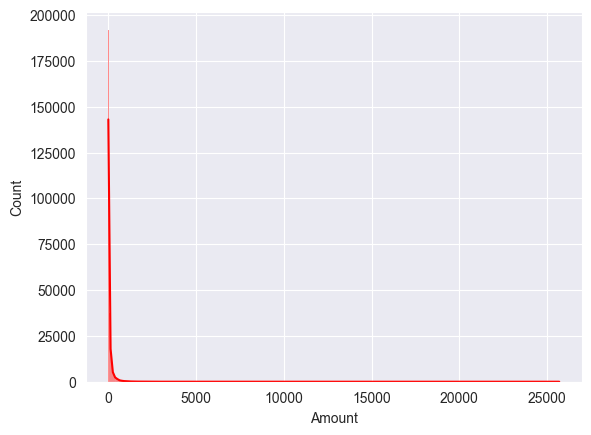

In [101]:
sns.histplot(data['Amount'], kde=True, color='red', bins=500)

We can see that most of the transactions are less than 1000. We can use undersampling to balance the data. For that, we will apply undersampling in Feature development and Model Building.

Now, we will visualize feature distribution to understand the distribution of 'time' feature using histogram.

<Axes: xlabel='Time', ylabel='Count'>

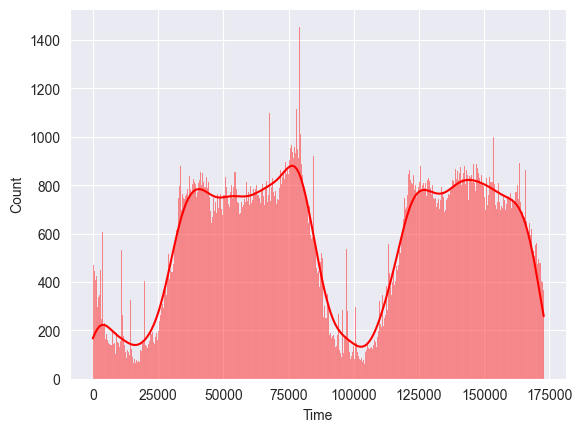

In [118]:
sns.histplot(data['Time'], kde=True, color='red', bins=500)

## Class Distribution

Here, we will visualize class distribution and understand imbalance between fraudulent and non-fraudulent transactions.

In [79]:
# counting number of fraud and valid transactions.
print("Fraudulent transactions: ", data[data['Class'] == 1].shape[0])
print("Non-fraudulent transactions: ", data[data['Class'] == 0].shape[0])

Fradulent transactions:  492
Non-fradulent transactions:  284315


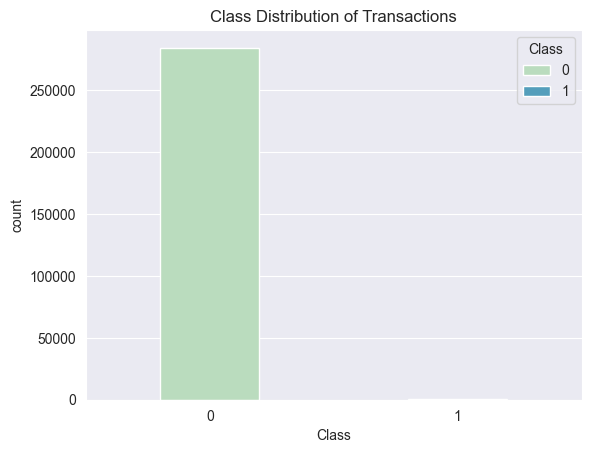

In [116]:
# visualize class distribution
sns.countplot( 
    x='Class', 
    data=data, 
    palette='GnBu', 
    width=0.4,
    hue='Class',
)
plt.title('Class Distribution of Transactions')
plt.show()

We used 0 as non-fraudulent and 1 as fraudulent. We can see that there is an imbalance between fraudulent and non-fraudulent transactions. We can use SMOTE to balance the data. Also we can use undersampling (as we have only 492 fraudulent transactions) to balance the data. We will apply those in Feature development and Model Building.

## Correlation Matrix

We can also plot correlation matrix to understand the correlation between features.

<Axes: >

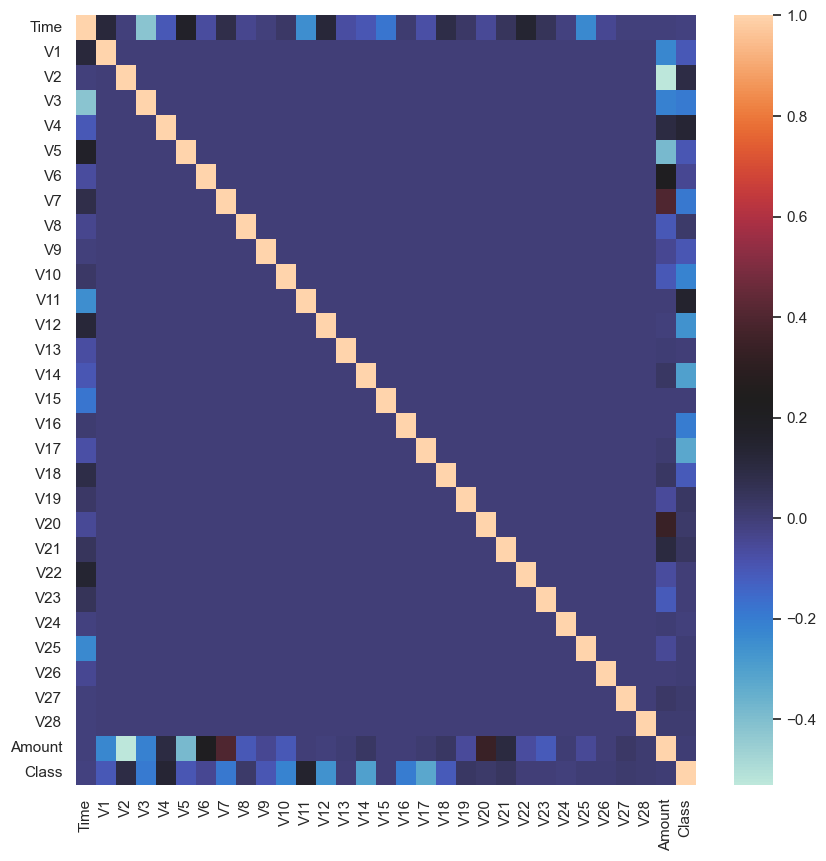

In [120]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(), annot=False, fmt='.2f', cmap='icefire')

Here in correlation matrix plot, we can see that there is some correlation between features. For example, "V2", "V3", "V4". However, it is not strong. We can conclude that there is no strong correlation between features. Nonetheless, we will avoid feature selection with those columns to avoid redundancy. 

## Anomaly Detection using Isolation Forest

In [ ]:
# We will use Isolation Forest to detect anomalies.
data['Anomaly'] = detect_anomalies(data.drop(columns='Class'))

# Feature Engineering

In [ ]:
cleaned_data = clean_data(data)
scaled_data = scale_features(cleaned_data)
cleaned_data.describe()
scaled_data.describe()

# Model Building

# Model Evaluation 

# Conclusion

# Reference